# 1.import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2.import the dataset

In [2]:
calender = pd.read_csv("C:\M5 forcaste dataset\calender.csv")
sale_train_evaluation = pd.read_csv("C:\M5 forcaste dataset\sale_train_evaluation.csv")
sale_train_validation = pd.read_csv("C:\M5 forcaste dataset\sale_train_validation.csv")
sample_submission = pd.read_csv("C:\M5 forcaste dataset\sample_submission.csv")
sell_prices = pd.read_csv("C:\M5 forcaste dataset\sell_prices.csv")

In [7]:
calender.shape

(1969, 14)

In [3]:
calender.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [4]:
calender.tail()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0
1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0


In [5]:
calender.describe()

,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,11347.086338,3.997461,6.325546,2013.288471,0.330117,0.330117,0.330117
std,155.277043,2.001141,3.416864,1.580198,0.470374,0.470374,0.470374
min,11101.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000
25%,11219.000000,2.000000,3.000000,2012.000000,0.000000,0.000000,0.000000
50%,11337.000000,4.000000,6.000000,2013.000000,0.000000,0.000000,0.000000
75%,11502.000000,6.000000,9.000000,2015.000000,1.000000,1.000000,1.000000
max,11621.000000,7.000000,12.000000,2016.000000,1.000000,1.000000,1.000000


In [6]:
calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [9]:
corr=calender.corr(numeric_only = True)
corr

,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI
wm_yr_wk,1.000000,-0.002240,-0.044488,0.989229,0.000716,0.002462,0.002664
wday,-0.002240,1.000000,-0.000845,0.001517,0.001971,0.000891,-0.003428
month,-0.044488,-0.000845,1.000000,-0.171836,-0.003669,-0.003669,-0.003669
year,0.989229,0.001517,-0.171836,1.000000,0.008541,0.008541,0.008541
snap_CA,0.000716,0.001971,-0.003669,0.008541,1.000000,0.402881,0.402881
snap_TX,0.002462,0.000891,-0.003669,0.008541,0.402881,1.000000,0.552161
snap_WI,0.002664,-0.003428,-0.003669,0.008541,0.402881,0.552161,1.000000


<Axes: >

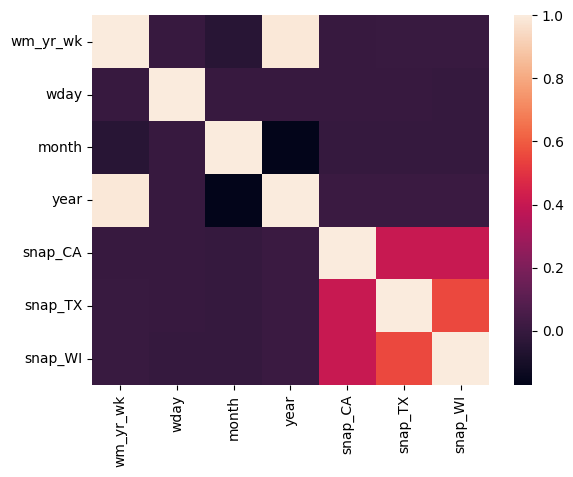

In [10]:
sns.heatmap(corr)

In [11]:
sale_train_evaluation.shape

(30490, 1947)

In [12]:
sale_train_evaluation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [13]:
sale_train_evaluation.tail()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0
30489,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,2,0,5,4,0,2,2,5,1


In [14]:
sale_train_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB


In [15]:
sale_train_evaluation.describe()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
count,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,...,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000
mean,1.070220,1.041292,0.780026,0.833454,0.627944,0.958052,0.918662,1.244080,1.073663,0.838701,...,1.445490,1.781174,1.965267,1.389374,1.271794,1.216661,1.212299,1.395605,1.689669,1.782158
std,5.126689,5.365468,3.667454,4.415141,3.379344,4.785947,5.059495,6.617729,5.917204,4.206199,...,3.656824,4.426550,4.706284,3.313292,3.126178,3.000348,2.955910,3.514318,4.089208,4.284356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
max,360.000000,436.000000,207.000000,323.000000,296.000000,314.000000,316.000000,370.000000,385.000000,353.000000,...,143.000000,156.000000,187.000000,98.000000,90.000000,77.000000,84.000000,110.000000,156.000000,117.000000


In [16]:
corr = sale_train_evaluation.corr(numeric_only = True)
corr

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
d_1,1.000000,0.894945,0.819378,0.805792,0.790104,0.825835,0.813880,0.851729,0.838286,0.760621,...,0.448557,0.427984,0.419846,0.386245,0.394730,0.398653,0.395844,0.466658,0.449075,0.449002
d_2,0.894945,1.000000,0.824156,0.822570,0.817022,0.814014,0.803917,0.841215,0.840235,0.762596,...,0.428693,0.401477,0.392254,0.365031,0.362578,0.371138,0.370891,0.438967,0.422788,0.422485
d_3,0.819378,0.824156,1.000000,0.777682,0.753741,0.790992,0.758745,0.777716,0.785025,0.710665,...,0.442363,0.426264,0.405135,0.378902,0.377483,0.387174,0.393100,0.446114,0.431127,0.433783
d_4,0.805792,0.822570,0.777682,1.000000,0.817413,0.829412,0.821976,0.821191,0.798350,0.743539,...,0.399438,0.387039,0.384761,0.371044,0.361262,0.357351,0.363434,0.402062,0.391408,0.401719
d_5,0.790104,0.817022,0.753741,0.817413,1.000000,0.814588,0.787646,0.771953,0.788582,0.770601,...,0.399823,0.384342,0.388384,0.357039,0.356491,0.367121,0.356084,0.408287,0.393536,0.404352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1937,0.398653,0.371138,0.387174,0.357351,0.367121,0.382098,0.391096,0.401021,0.394732,0.371038,...,0.696379,0.701416,0.702900,0.692700,0.717609,1.000000,0.698250,0.720684,0.708208,0.730667
d_1938,0.395844,0.370891,0.393100,0.363434,0.356084,0.390764,0.392195,0.396135,0.390437,0.361792,...,0.715970,0.716162,0.706530,0.677848,0.694022,0.698250,1.000000,0.719033,0.712089,0.711371
d_1939,0.466658,0.438967,0.446114,0.402062,0.408287,0.444709,0.450098,0.453849,0.452654,0.407245,...,0.761440,0.738371,0.731476,0.700345,0.717229,0.720684,0.719033,1.000000,0.770046,0.769700
d_1940,0.449075,0.422788,0.431127,0.391408,0.393536,0.433790,0.452550,0.453006,0.455505,0.402681,...,0.751717,0.746196,0.735662,0.697596,0.713828,0.708208,0.712089,0.770046,1.000000,0.772883


<Axes: >

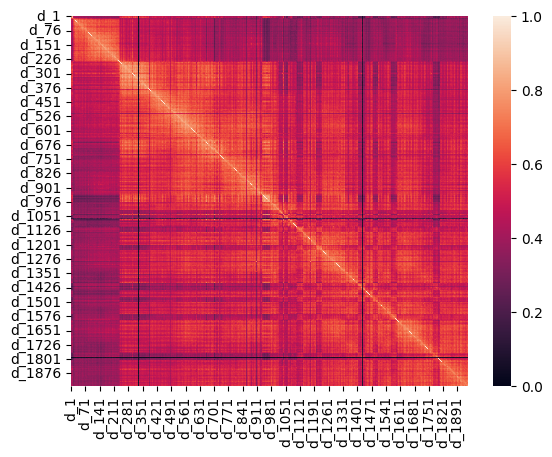

In [17]:
sns.heatmap(corr)

In [18]:
sale_train_validation.shape

(30490, 1919)

In [19]:
sale_train_validation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [20]:
sale_train_validation.tail()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3
30489,FOODS_3_827_WI_3_validation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
sale_train_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


In [22]:
sale_train_validation.describe()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
count,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,...,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000
mean,1.070220,1.041292,0.780026,0.833454,0.627944,0.958052,0.918662,1.244080,1.073663,0.838701,...,1.370581,1.586159,1.693670,1.248245,1.232207,1.159167,1.149000,1.328862,1.605838,1.633158
std,5.126689,5.365468,3.667454,4.415141,3.379344,4.785947,5.059495,6.617729,5.917204,4.206199,...,3.740017,4.097191,4.359809,3.276925,3.125471,2.876026,2.950364,3.358012,4.089422,3.812248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
max,360.000000,436.000000,207.000000,323.000000,296.000000,314.000000,316.000000,370.000000,385.000000,353.000000,...,129.000000,160.000000,204.000000,98.000000,100.000000,88.000000,77.000000,141.000000,171.000000,130.000000


In [23]:
corr = sale_train_validation.corr(numeric_only = True)

In [24]:
corr

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
d_1,1.000000,0.894945,0.819378,0.805792,0.790104,0.825835,0.813880,0.851729,0.838286,0.760621,...,0.436212,0.472028,0.428795,0.423657,0.415395,0.423476,0.409793,0.464982,0.491050,0.419571
d_2,0.894945,1.000000,0.824156,0.822570,0.817022,0.814014,0.803917,0.841215,0.840235,0.762596,...,0.407350,0.452535,0.405424,0.396272,0.396896,0.393112,0.382030,0.440165,0.463843,0.393623
d_3,0.819378,0.824156,1.000000,0.777682,0.753741,0.790992,0.758745,0.777716,0.785025,0.710665,...,0.440630,0.458278,0.434382,0.421456,0.421704,0.421369,0.402831,0.438006,0.469882,0.412980
d_4,0.805792,0.822570,0.777682,1.000000,0.817413,0.829412,0.821976,0.821191,0.798350,0.743539,...,0.394584,0.417894,0.393553,0.390832,0.384943,0.400457,0.379679,0.417173,0.426223,0.377307
d_5,0.790104,0.817022,0.753741,0.817413,1.000000,0.814588,0.787646,0.771953,0.788582,0.770601,...,0.385994,0.409850,0.393554,0.390513,0.379013,0.381134,0.380287,0.419002,0.418341,0.383520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1909,0.423476,0.393112,0.421369,0.400457,0.381134,0.415010,0.427464,0.417739,0.425746,0.373069,...,0.680057,0.707631,0.703689,0.676945,0.718330,1.000000,0.716155,0.720121,0.717647,0.717373
d_1910,0.409793,0.382030,0.402831,0.379679,0.380287,0.403011,0.411345,0.411362,0.416551,0.381657,...,0.702000,0.719647,0.721799,0.671633,0.719299,0.716155,1.000000,0.743752,0.733028,0.730956
d_1911,0.464982,0.440165,0.438006,0.417173,0.419002,0.446165,0.475992,0.461283,0.463663,0.409799,...,0.735921,0.751955,0.745575,0.689068,0.717089,0.720121,0.743752,1.000000,0.771683,0.738942
d_1912,0.491050,0.463843,0.469882,0.426223,0.418341,0.456690,0.483692,0.491958,0.489117,0.413548,...,0.737403,0.794435,0.766192,0.713165,0.730783,0.717647,0.733028,0.771683,1.000000,0.778604


<Axes: >

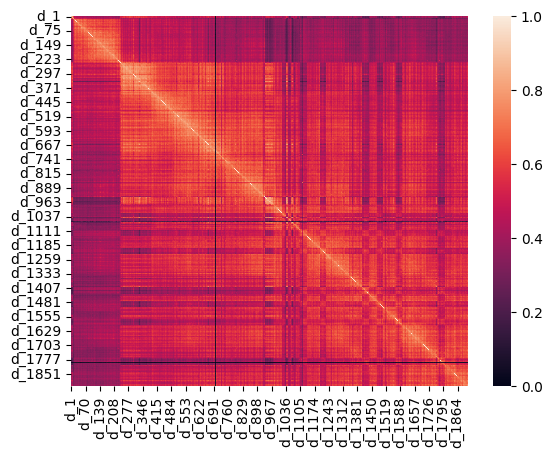

In [25]:
sns.heatmap(corr)

In [26]:
sell_prices.shape

(6841121, 4)

In [27]:
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [28]:
sell_prices.tail()

,store_id,item_id,wm_yr_wk,sell_price
6841116,WI_3,FOODS_3_827,11617,1.0
6841117,WI_3,FOODS_3_827,11618,1.0
6841118,WI_3,FOODS_3_827,11619,1.0
6841119,WI_3,FOODS_3_827,11620,1.0
6841120,WI_3,FOODS_3_827,11621,1.0


In [29]:
sell_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [30]:
sell_prices.describe()

,wm_yr_wk,sell_price
count,6.841121e+06,6.841121e+06
mean,1.138294e+04,4.410952e+00
std,1.486100e+02,3.408814e+00
min,1.110100e+04,1.000000e-02
25%,1.124700e+04,2.180000e+00
50%,1.141100e+04,3.470000e+00
75%,1.151700e+04,5.840000e+00
max,1.162100e+04,1.073200e+02


In [31]:
corr = sell_prices.corr(numeric_only = True)
corr

,wm_yr_wk,sell_price
wm_yr_wk,1.000000,0.019475
sell_price,0.019475,1.000000


<Axes: >

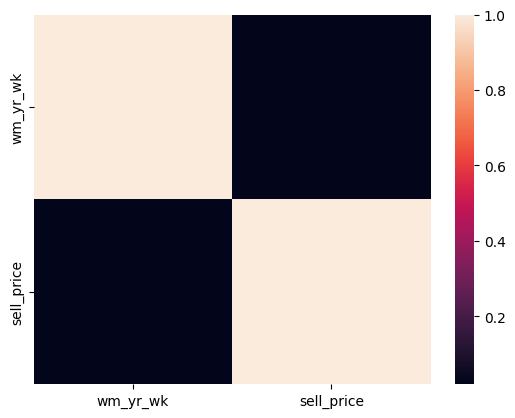

In [32]:
sns.heatmap(corr)

# 3.Handling null values

In [35]:
calender.isnull().any()

date            False
wm_yr_wk        False
weekday         False
wday            False
month           False
year            False
d               False
event_name_1     True
event_type_1     True
event_name_2     True
event_type_2     True
snap_CA         False
snap_TX         False
snap_WI         False
dtype: bool

In [34]:
calender.isnull().sum()

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

In [36]:
sale_train_evaluation.isnull().any()

id          False
item_id     False
dept_id     False
cat_id      False
store_id    False
            ...  
d_1937      False
d_1938      False
d_1939      False
d_1940      False
d_1941      False
Length: 1947, dtype: bool

In [37]:
sale_train_evaluation.isnull().sum()

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
           ..
d_1937      0
d_1938      0
d_1939      0
d_1940      0
d_1941      0
Length: 1947, dtype: int64

In [38]:
sale_train_validation.isnull().any()

id          False
item_id     False
dept_id     False
cat_id      False
store_id    False
            ...  
d_1909      False
d_1910      False
d_1911      False
d_1912      False
d_1913      False
Length: 1919, dtype: bool

In [39]:
sale_train_validation.isnull().sum()

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
           ..
d_1909      0
d_1910      0
d_1911      0
d_1912      0
d_1913      0
Length: 1919, dtype: int64

In [40]:
sell_prices.isnull().any()

store_id      False
item_id       False
wm_yr_wk      False
sell_price    False
dtype: bool

In [41]:
sell_prices.isnull().sum()

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64

# 4.Outlier detection

<Axes: xlabel='wm_yr_wk'>

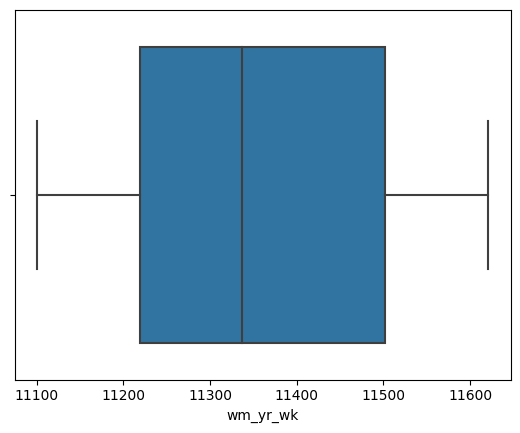

In [44]:
sns.boxplot(x = calender.wm_yr_wk)

# 5.Encoding

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le = LabelEncoder()

In [5]:
label_encodings = {}

for column in calender.columns:
    if calender[column].dtype == "object":
        if column != "date" and column != "d":
            calender[column] = le.fit_transform(calender[column])
            label_encodings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

for column, mapping in label_encodings.items():
    print(f"Label encoding mapping for {column}: {mapping}")

Label encoding mapping for weekday: {'Friday': 0, 'Monday': 1, 'Saturday': 2, 'Sunday': 3, 'Thursday': 4, 'Tuesday': 5, 'Wednesday': 6}
Label encoding mapping for event_name_1: {'Chanukah End': 0, 'Christmas': 1, 'Cinco De Mayo': 2, 'ColumbusDay': 3, 'Easter': 4, 'Eid al-Fitr': 5, 'EidAlAdha': 6, "Father's day": 7, 'Halloween': 8, 'IndependenceDay': 9, 'LaborDay': 10, 'LentStart': 11, 'LentWeek2': 12, 'MartinLutherKingDay': 13, 'MemorialDay': 14, "Mother's day": 15, 'NBAFinalsEnd': 16, 'NBAFinalsStart': 17, 'NewYear': 18, 'OrthodoxChristmas': 19, 'OrthodoxEaster': 20, 'Pesach End': 21, 'PresidentsDay': 22, 'Purim End': 23, 'Ramadan starts': 24, 'StPatricksDay': 25, 'SuperBowl': 26, 'Thanksgiving': 27, 'ValentinesDay': 28, 'VeteransDay': 29, nan: 30}
Label encoding mapping for event_type_1: {'Cultural': 0, 'National': 1, 'Religious': 2, 'Sporting': 3, nan: 4}
Label encoding mapping for event_name_2: {'Cinco De Mayo': 0, 'Easter': 1, "Father's day": 2, 'OrthodoxEaster': 3, nan: 4}
Label 

In [6]:
for column in sale_train_evaluation.columns:
    if sale_train_evaluation[column].dtype == "object":
        if column in label_encodings:
            sale_train_evaluation[column] = sale_train_evaluation[column].map(label_encodings[column])
        else:
            sale_train_evaluation[column] = le.fit_transform(sale_train_evaluation[column])
            label_encodings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

for column, mapping in label_encodings.items():
    print(f"Label encoding mapping for {column}: {mapping}")


Label encoding mapping for weekday: {'Friday': 0, 'Monday': 1, 'Saturday': 2, 'Sunday': 3, 'Thursday': 4, 'Tuesday': 5, 'Wednesday': 6}
Label encoding mapping for event_name_1: {'Chanukah End': 0, 'Christmas': 1, 'Cinco De Mayo': 2, 'ColumbusDay': 3, 'Easter': 4, 'Eid al-Fitr': 5, 'EidAlAdha': 6, "Father's day": 7, 'Halloween': 8, 'IndependenceDay': 9, 'LaborDay': 10, 'LentStart': 11, 'LentWeek2': 12, 'MartinLutherKingDay': 13, 'MemorialDay': 14, "Mother's day": 15, 'NBAFinalsEnd': 16, 'NBAFinalsStart': 17, 'NewYear': 18, 'OrthodoxChristmas': 19, 'OrthodoxEaster': 20, 'Pesach End': 21, 'PresidentsDay': 22, 'Purim End': 23, 'Ramadan starts': 24, 'StPatricksDay': 25, 'SuperBowl': 26, 'Thanksgiving': 27, 'ValentinesDay': 28, 'VeteransDay': 29, nan: 30}
Label encoding mapping for event_type_1: {'Cultural': 0, 'National': 1, 'Religious': 2, 'Sporting': 3, nan: 4}
Label encoding mapping for event_name_2: {'Cinco De Mayo': 0, 'Easter': 1, "Father's day": 2, 'OrthodoxEaster': 3, nan: 4}
Label 

In [7]:
for column in sell_prices.columns:
    if sell_prices[column].dtype == "object":
        if column in label_encodings:
            sell_prices[column] = sell_prices[column].map(label_encodings[column])
        else:
            sell_prices[column] = le.fit_transform(sell_prices[column])
            label_encodings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

for column, mapping in label_encodings.items():
    print(f"Label encoding mapping for {column}: {mapping}")


Label encoding mapping for weekday: {'Friday': 0, 'Monday': 1, 'Saturday': 2, 'Sunday': 3, 'Thursday': 4, 'Tuesday': 5, 'Wednesday': 6}
Label encoding mapping for event_name_1: {'Chanukah End': 0, 'Christmas': 1, 'Cinco De Mayo': 2, 'ColumbusDay': 3, 'Easter': 4, 'Eid al-Fitr': 5, 'EidAlAdha': 6, "Father's day": 7, 'Halloween': 8, 'IndependenceDay': 9, 'LaborDay': 10, 'LentStart': 11, 'LentWeek2': 12, 'MartinLutherKingDay': 13, 'MemorialDay': 14, "Mother's day": 15, 'NBAFinalsEnd': 16, 'NBAFinalsStart': 17, 'NewYear': 18, 'OrthodoxChristmas': 19, 'OrthodoxEaster': 20, 'Pesach End': 21, 'PresidentsDay': 22, 'Purim End': 23, 'Ramadan starts': 24, 'StPatricksDay': 25, 'SuperBowl': 26, 'Thanksgiving': 27, 'ValentinesDay': 28, 'VeteransDay': 29, nan: 30}
Label encoding mapping for event_type_1: {'Cultural': 0, 'National': 1, 'Religious': 2, 'Sporting': 3, nan: 4}
Label encoding mapping for event_name_2: {'Cinco De Mayo': 0, 'Easter': 1, "Father's day": 2, 'OrthodoxEaster': 3, nan: 4}
Label 

# 6. Seperate Dependent and independent variables

In [8]:
unique_pairs1 = sale_train_evaluation[['cat_id', 'store_id']].drop_duplicates()
print(unique_pairs1)

       cat_id  store_id
0           1         0
565         2         0
1612        0         0
3049        1         1
3614        2         1
4661        0         1
6098        1         2
6663        2         2
7710        0         2
9147        1         3
9712        2         3
10759       0         3
12196       1         4
12761       2         4
13808       0         4
15245       1         5
15810       2         5
16857       0         5
18294       1         6
18859       2         6
19906       0         6
21343       1         7
21908       2         7
22955       0         7
24392       1         8
24957       2         8
26004       0         8
27441       1         9
28006       2         9
29053       0         9


In [9]:
my_dict = {}
for index, row in calender.iterrows():
    key = row['wm_yr_wk'] + row['weekday']*100000
    value = row['d']
    my_dict[key] = value

In [10]:
cids = list(range(3))  
sids = list(range(10))

In [ ]:
first_iteration = True
columns_to_keep = ['item_id', 'store_id', 'state_id', 'd_value', 'date', 'sell_price']
headers = ['item_id', 'wm_yr_wk', 'weekday', 'd1', 'd_value']
for p1 in cids:
    for p2 in sids:
        print(p2)
        filtered_data = sale_train_evaluation[(sale_train_evaluation['cat_id'] == p1) & (sale_train_evaluation['store_id'] == p2)]
        merged_data = filtered_data.merge(sell_prices, on=['store_id', 'item_id'], how='inner')
        selected_columns = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'wm_yr_wk', 'sell_price']
        selected_data = merged_data[selected_columns]
        merged_data1 = selected_data.merge(calender, on=['wm_yr_wk'], how='inner')
        data_to_append = []
        weekdays = [2, 3, 1, 5, 6, 4, 0]
        for index, row in merged_data.iterrows():
            for day in weekdays:
                y = int(row['wm_yr_wk']+100000*day)
                if y not in my_dict:
                    continue
                l = []
                l.append(row['item_id'])
                l.append(row['wm_yr_wk'])
                l.append(day)

                # Get the column_name (d) for the corresponding wm_yr_wk and weekday
                column_name = my_dict[int(row['wm_yr_wk']+100000*day)]
                l.append(column_name)
                y = int(column_name.split('_')[1])
                if y < 1942:
                    l.append(row[column_name])
                else:
                    l.append(-1)
                data_to_append.append(l)
        df = pd.DataFrame(data_to_append, columns=headers)
        merged_data2 = merged_data1.merge(df, on=['wm_yr_wk','item_id','weekday'], how='inner')
        merged_data2.drop(merged_data2.columns.difference(columns_to_keep), axis=1, inplace=True)
        if first_iteration:
            merged_data2.to_csv(r"C:\M5 forcaste dataset\dataset_{}.csv".format(p1), index=False)
            first_iteration = False
        else:
            existing_data = pd.read_csv(r"C:\M5 forcaste dataset\dataset_{}.csv".format(p1))
            concatenated_data = pd.concat([existing_data, merged_data2], ignore_index=True)
            concatenated_data.to_csv(r"C:\M5 forcaste dataset\dataset_{}.csv".format(p1), index=False)

0
1
2
3
4
5
6
7
8
9
